**Import the relevant libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

**Load the data**

In [4]:
raw_data = pd.read_csv(r'C:\Users\user\Downloads\cleaned_startup_data.xls')
raw_data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,1.0,0,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,3.0,0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,1.0,0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,1.0,0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,1.0,0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,1.0,0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,1.0,0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,1.0,0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,1.0,0,0,0,6.17,0,13.527828


In [5]:
#drop offices and is_acquired 
columns_to_drop = ['offices', 'is_acquired']

In [6]:
data = raw_data.drop(columns=columns_to_drop)
data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,ipo,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,0,0,6.17,0,13.527828


In [7]:
data.head(10)

,company_id,category_code,country_code,state_code,total_rounds,average_participants,ipo,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,0,0,5.00,0,13.234838
5,c:10082,analytics,USA,California,1,4.0,0,0,6.01,0,14.946913
6,c:10098,software,USA,other,1,0.0,0,0,6.69,0,12.542545
7,c:101052,government,USA,other,2,4.0,0,0,3.66,0,11.421358
8,c:101094,ecommerce,USA,other,2,0.5,0,0,6.01,0,15.387442
9,c:10111,mobile,other,other,2,3.0,0,0,5.42,0,15.894952


**Identify the unique data points in category code**

In [9]:
data['category_code'].value_counts()

category_code
software            1043
web                  800
biotech              599
mobile               558
enterprise           528
advertising          419
games_video          414
ecommerce            406
analytics            226
hardware             216
health               183
cleantech            175
social               167
finance              138
education            133
medical              126
other                116
unknown              108
network_hosting      108
search                93
security              84
messaging             81
travel                72
fashion               68
hospitality           65
music                 64
public_relations      62
manufacturing         62
news                  58
consulting            58
semiconductor         46
sports                42
real_estate           36
photo_video           36
nonprofit             23
transportation        21
automotive            17
nanotech              16
design                13
legal      

**Map the category code**

In [11]:
category_mapped = data.copy()
category_mapped['category_code'] = category_mapped['category_code'].map({'health':0, 'education':1, 'games_video':2, 'web':3, 'analytics':4,
       'software':5, 'government':6, 'ecommerce':7, 'mobile':8, 'other':9,
       'finance':10, 'advertising':11, 'photo_video':12, 'enterprise':13, 'travel':14,
       'social':15, 'transportation':16, 'hospitality':17, 'public_relations':18,
       'biotech':19, 'medical':20, 'network_hosting':21, 'messaging':22, 'music':23,
       'cleantech':24, 'security':25, 'sports':26, 'search':27, 'consulting':28,
       'nonprofit':29, 'hardware':30, 'real_estate':31, 'news':32, 'fashion':33,
       'manufacturing':34, 'legal':35, 'design':36, 'unknown':37, 'automotive':38,
       'local':39, 'semiconductor':40, 'pets':41, 'nanotech':42})
category_mapped

,company_id,category_code,country_code,state_code,total_rounds,average_participants,ipo,is_closed,age_years,status,log_average_funded
0,c:10015,0,USA,California,5,3.8,0,0,6.26,0,16.426597
1,c:100228,1,USA,other,1,0.0,0,0,3.25,0,11.512925
2,c:100607,2,USA,California,1,1.0,0,0,3.00,0,10.596635
3,c:10075,3,USA,California,1,0.0,0,0,6.15,0,12.765688
4,c:100756,1,other,other,1,1.0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,13,USA,other,1,6.0,0,0,3.00,0,13.527828
7506,c:9975,3,other,other,1,0.0,0,0,6.30,0,13.590714
7507,c:9977,8,USA,California,1,0.0,0,1,5.62,0,11.775290
7508,c:9995,18,USA,California,1,0.0,0,0,6.17,0,13.527828


**Create a new DataFrame**

In [13]:
# Create a new DataFrame with selected variables for clustering
cluster_data = category_mapped[[col for col in data.columns if col.startswith('category_')] + 
                    ['total_rounds', 'average_participants',
                     'age_years', 'log_average_funded']]

In [14]:
cluster_data

,category_code,total_rounds,average_participants,age_years,log_average_funded
0,0,5,3.8,6.26,16.426597
1,1,1,0.0,3.25,11.512925
2,2,1,1.0,3.00,10.596635
3,3,1,0.0,6.15,12.765688
4,1,1,1.0,5.00,13.234838
...,...,...,...,...,...
7505,13,1,6.0,3.00,13.527828
7506,3,1,0.0,6.30,13.590714
7507,8,1,0.0,5.62,11.775290
7508,18,1,0.0,6.17,13.527828


In [15]:
#select the features
x = cluster_data.iloc[:,0:5]
x

,category_code,total_rounds,average_participants,age_years,log_average_funded
0,0,5,3.8,6.26,16.426597
1,1,1,0.0,3.25,11.512925
2,2,1,1.0,3.00,10.596635
3,3,1,0.0,6.15,12.765688
4,1,1,1.0,5.00,13.234838
...,...,...,...,...,...
7505,13,1,6.0,3.00,13.527828
7506,3,1,0.0,6.30,13.590714
7507,8,1,0.0,5.62,11.775290
7508,18,1,0.0,6.17,13.527828


**Standardize the numeric columns before clustering**

In [17]:
columns_to_scale = ['total_rounds', 'average_participants', 'age_years', 'log_average_funded']

In [18]:
#declare a scaler object
scaler = StandardScaler()

In [19]:
scaler.fit(x)

StandardScaler()

In [20]:
x_scaled = scaler.fit_transform(x[columns_to_scale])

In [21]:
x_scaled

array([[ 3.10008162,  1.77524193,  1.49655475,  1.43895167],
       [-0.74748291, -0.82225783, -1.11074928, -1.30016834],
       [-0.74748291, -0.13870526, -1.32730277, -1.81095341],
       ...,
       [-0.74748291, -0.82225783,  0.94217781, -1.15391373],
       [-0.74748291, -0.82225783,  1.41859549, -0.1769633 ],
       [-0.74748291, -0.82225783,  1.56585187, -0.43158267]])

**Create a new dataframe  for the category code and scaled features**

In [23]:
# Convert the scaled array back into a DataFrame
scaled_df = pd.DataFrame(x_scaled, columns=columns_to_scale, index=x.index)

In [24]:
scaled_df

,total_rounds,average_participants,age_years,log_average_funded
0,3.100082,1.775242,1.496555,1.438952
1,-0.747483,-0.822258,-1.110749,-1.300168
2,-0.747483,-0.138705,-1.327303,-1.810953
3,-0.747483,-0.822258,1.401271,-0.601817
4,-0.747483,-0.138705,0.405125,-0.340290
...,...,...,...,...
7505,-0.747483,3.279058,-1.327303,-0.176963
7506,-0.747483,-0.822258,1.531203,-0.141908
7507,-0.747483,-0.822258,0.942178,-1.153914
7508,-0.747483,-0.822258,1.418595,-0.176963


In [25]:
# Combine scaled numeric features with encoded 'category_code'
scaled_data = pd.concat([scaled_df, x['category_code']], axis=1)

In [26]:
scaled_data.head()

,total_rounds,average_participants,age_years,log_average_funded,category_code
0,3.100082,1.775242,1.496555,1.438952,0
1,-0.747483,-0.822258,-1.110749,-1.300168,1
2,-0.747483,-0.138705,-1.327303,-1.810953,2
3,-0.747483,-0.822258,1.401271,-0.601817,3
4,-0.747483,-0.138705,0.405125,-0.340290,1


**Clustering**

In [79]:
#declare the k-means variable
kmeans = KMeans(3)

In [81]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [83]:
identified_clusters = kmeans.fit_predict(scaled_data)
identified_clusters

array([0, 0, 0, ..., 0, 2, 0])

**Create a dataframe to view in tabular form**

In [85]:
#create a dataframe to see things more clearly
data_with_clusters = scaled_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,total_rounds,average_participants,age_years,log_average_funded,category_code,Cluster
0,3.100082,1.775242,1.496555,1.438952,0,0
1,-0.747483,-0.822258,-1.110749,-1.300168,1,0
2,-0.747483,-0.138705,-1.327303,-1.810953,2,0
3,-0.747483,-0.822258,1.401271,-0.601817,3,0
4,-0.747483,-0.138705,0.405125,-0.340290,1,0
...,...,...,...,...,...,...
7505,-0.747483,3.279058,-1.327303,-0.176963,13,2
7506,-0.747483,-0.822258,1.531203,-0.141908,3,0
7507,-0.747483,-0.822258,0.942178,-1.153914,8,0
7508,-0.747483,-0.822258,1.418595,-0.176963,18,2


**Create the plot**

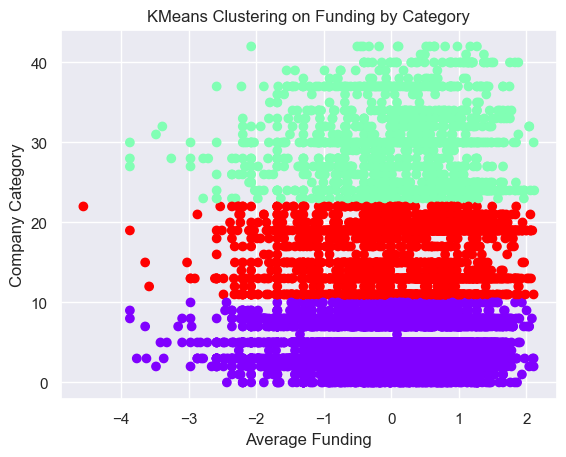

In [87]:
plt.scatter(data_with_clusters['log_average_funded'], data_with_clusters['category_code'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Average Funding')
plt.ylabel('Company Category')
plt.title('KMeans Clustering on Funding by Category')
plt.show()

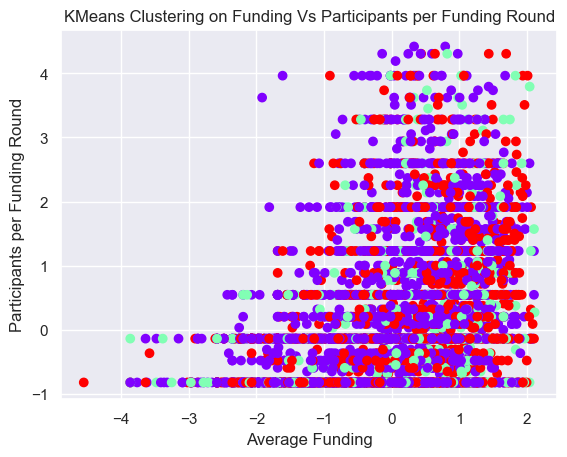

In [89]:
plt.scatter(data_with_clusters['log_average_funded'], data_with_clusters['average_participants'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Average Funding')
plt.ylabel('Participants per Funding Round')
plt.title('KMeans Clustering on Funding Vs Participants per Funding Round')
plt.show()

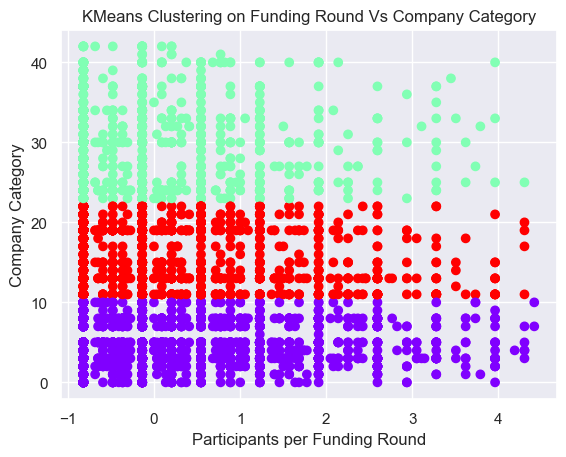

In [91]:
plt.scatter(data_with_clusters['average_participants'], data_with_clusters['category_code'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Participants per Funding Round')
plt.ylabel('Company Category')
plt.title('KMeans Clustering on Funding Round Vs Company Category')
plt.show()

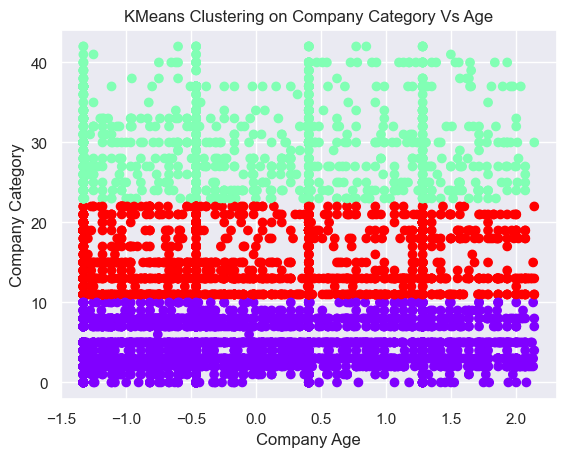

In [93]:
plt.scatter(data_with_clusters['age_years'], data_with_clusters['category_code'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Company Age')
plt.ylabel('Company Category')
plt.title('KMeans Clustering on Company Category Vs Age')
plt.show()

**Selecting the number of clusters: Calculate WCSS**

In [95]:
kmeans.inertia_

115721.8250959173

In [97]:
#calculate wcss for each cluster
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [99]:
wcss

[30039.99999999995,
 21559.21313726032,
 17694.69070822891,
 14523.56331895067,
 12310.71049132463,
 11190.950949669841,
 10168.715975934172,
 9489.148755856939,
 8912.146825906608,
 8339.430303249148]

**The elbow method**

Text(0, 0.5, 'Within-Cluster Sum of Squares')

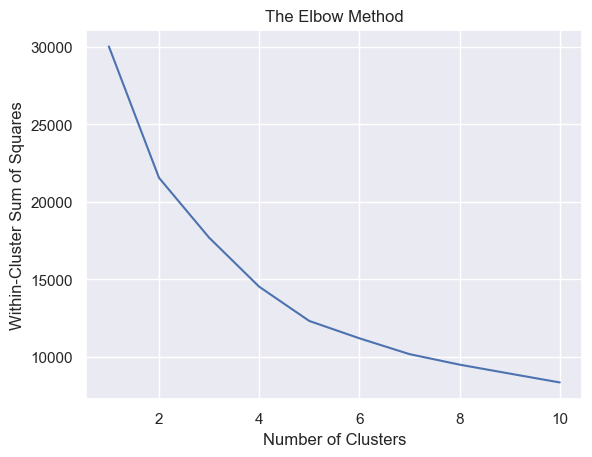

In [101]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

In [44]:
#end the project here, upload to github, and move to the next one